In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

In [3]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

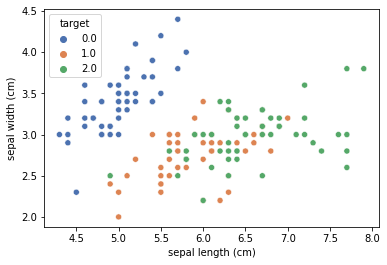

In [5]:
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="target", palette="deep")

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

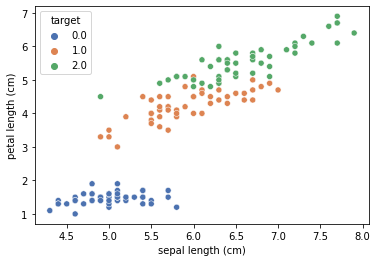

In [6]:
sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", hue="target", palette="deep")

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

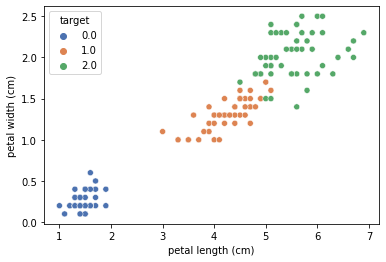

In [7]:
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="target", palette="deep")

In [8]:
X = df.drop(['target'], axis=1)
y = df['target']

In [9]:
X = StandardScaler().fit_transform(X)

In [10]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
normalised_x = pd.DataFrame(X,columns=feat_cols)

In [11]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

In [12]:
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
pca_df.head()

,principal component 1,principal component 2,principal component 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [13]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.72962445 0.22850762 0.03668922]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


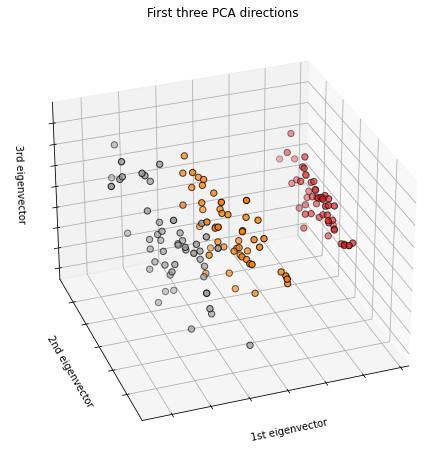

In [14]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(
    principalComponents[:, 0],
    principalComponents[:, 1],
    principalComponents[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## TSNE visualization

In [15]:
X_copy = df.drop(['target'], axis=1)
y_copy = df['target']

In [16]:
embedded_X = TSNE(n_components=2, learning_rate=50)
tsne_features = embedded_X.fit_transform(X_copy)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [17]:
df['tsne-2d-one'] = tsne_features[:,0]
df['tsne-2d-two'] = tsne_features[:,1]

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

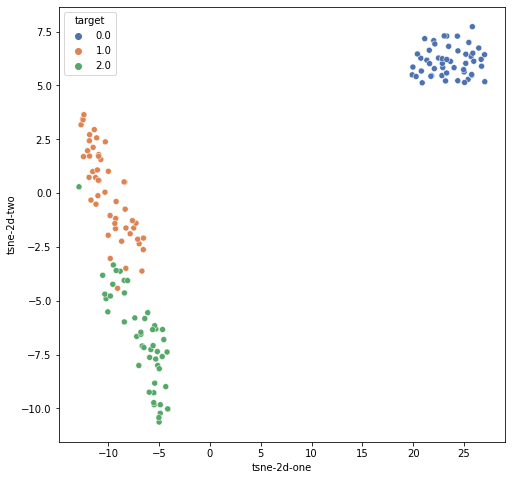

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    data=df,
    legend="full",
    palette="deep"
)